<a href="https://colab.research.google.com/github/sahin63201/AssignmentNo1/blob/main/diabetes_predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

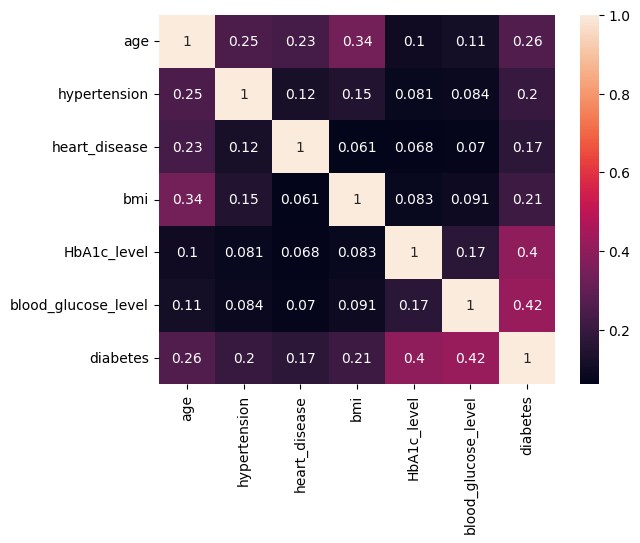

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
mapping = {
    'never': 'No',
    'No Info': 'No',
    'current': 'Yes',
    'former': 'Yes',
    'ever': 'Yes',
    'not current': 'Yes'
}

df["smoking_history"] = df["smoking_history"].replace(mapping)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_col = ['gender','smoking_history']
for col in le_col:
    df[col] = le.fit_transform(df[col])
df.astype(int)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [11]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['gender', 'age',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
df[columns] = scaler.fit_transform(df[columns])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.841047,1.692704,0,1,0,-0.321056,1.001706,0.047704,0
1,-0.841047,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1.187234,-0.616691,0,0,0,-0.000116,0.161108,0.489878,0
3,-0.841047,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1.187234,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0


In [13]:
x = df.drop(columns='diabetes')
y = df['diabetes']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_probs = model.predict_proba(x_test)[:, 1]
threshold = 0.33
y_pred = (y_probs >= threshold).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
y_test

,diabetes
75721,0
80184,0
19864,0
76699,0
92991,1
...,...
32595,0
29313,0
37862,0
53421,0


In [17]:
from sklearn.metrics import recall_score,f1_score,confusion_matrix,classification_report
recall_score(y_test,y_pred)

0.6908665105386417

In [18]:
f1_score(y_test,y_pred)

0.7206106870229008

In [19]:
confusion_matrix(y_test,y_pred)

array([[17905,   387],
       [  528,  1180]])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18292
           1       0.75      0.69      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.86      0.83      0.85     20000
weighted avg       0.95      0.95      0.95     20000

